# Final project
[Source](https://www.kaggle.com/c/shelter-animal-outcomes/kernels)

In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier

from pandas_profiling import ProfileReport

In [5]:
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv.gz', parse_dates=['DateTime'])
test = pd.read_csv('data/test.csv.gz', parse_dates=['DateTime'])

In [3]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [3]:
# ProfileReport(train).to_file('TrainReport.html')

In [4]:
def agetodays(x):
    try:
        y = x.split()
    except:
        return None 
    if 'year' in y[1]:
        return float(y[0]) * 365
    elif 'month' in y[1]:
        return float(y[0]) * (365/12)
    elif 'week' in y[1]:
        return float(y[0]) * 7
    elif 'day' in y[1]:
        return float(y[0])

train['AgeInDays'] = train.AgeuponOutcome.map(agetodays)

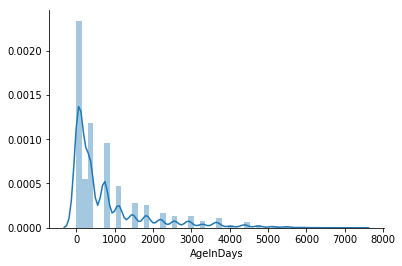

In [11]:
sns.distplot(train.AgeInDays.dropna());
sns.despine()

In [14]:
# remove empty age records
train = train[~train.AgeInDays.isnull()]

In [15]:
train.DateTime[0]

Timestamp('2014-02-12 18:22:00')

In [19]:
train.Breed.head()

0          Shetland Sheepdog Mix
1         Domestic Shorthair Mix
2                   Pit Bull Mix
3         Domestic Shorthair Mix
4    Lhasa Apso/Miniature Poodle
Name: Breed, dtype: object

In [22]:
train['Breed'].str.contains('Mix').dtypes

dtype('bool')

## Feature Engineering

In [6]:
train = pd.get_dummies(train, columns=['SexuponOutcome'] )
train['year'] = train.DateTime.dt.year
train['month'] = train.DateTime.dt.month
train['day'] = train.DateTime.dt.day
train['hour'] = train.DateTime.dt.hour
train['minute'] = train.DateTime.dt.minute
train['has_name'] = np.where(train.Name.isnull(), 0, 1).astype(int)
train['has_mix'] = train['Breed'].str.contains('Mix')

In [7]:
train.shape

(26729, 22)